# Maps
## Upper Olivares catchment - january, 2023
#### Paul Sandoval Quilodrán - https://github.com/SQPaul/Olivares

In [20]:
import matplotlib.pyplot as plt
from rasterio.plot import show
import rasterio as rio
import geopandas as gpd
from matplotlib.offsetbox import AnchoredText
import numpy as np

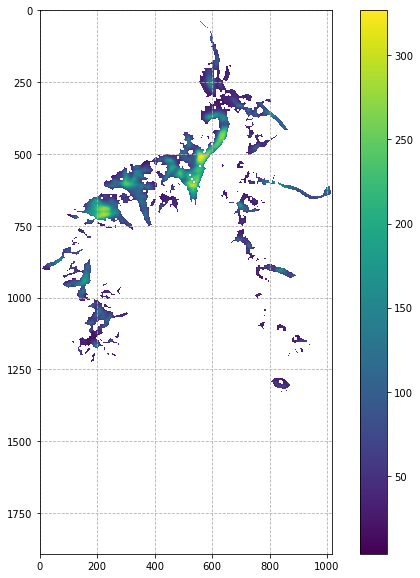

In [54]:
raster_path = r"P:\Projects\Olivares\GIS\glaciers\thickness\thickness_olivares.tif"
geometry_path = r"P:\Projects\Olivares\GIS\glaciers\olivares_rgi60_farinotti.shp"

raster = rio.open(raster_path).read(1)
geometry = gpd.read_file(geometry_path)

raster[raster == 0] = np.nan

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(raster)
plt.grid(ls = "--")
plt.colorbar(plt.imshow(raster))


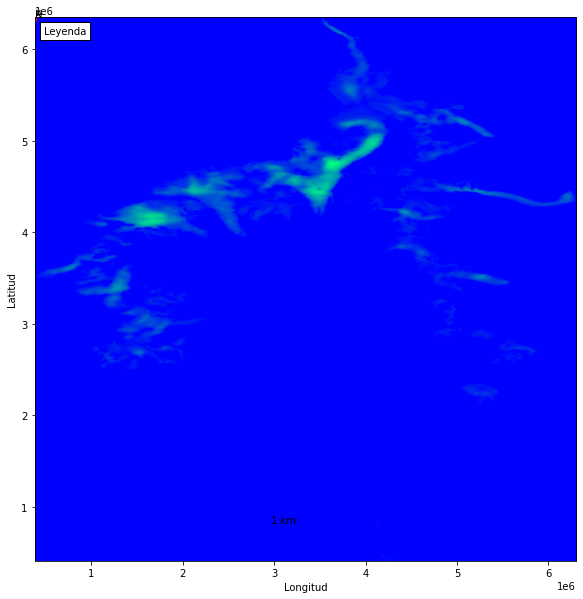

In [5]:
# Carga el raster en formato TIF
with rasterio.open(r"P:\Projects\Olivares\GIS\glaciers\thickness\thickness_olivares.tif") as src:
    raster = src.read()
    extent = src.bounds

# Carga el archivo de geometrías en formato Shapefile
geometries = gpd.read_file(r"P:\Projects\Olivares\GIS\glaciers\olivares_rgi60_farinotti.shp")

# Crea el mapa con el raster y las geometrías
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(raster[0], extent=extent, cmap='winter')
geometries.plot(ax=ax, facecolor='none', edgecolor='red')

# Agrega la leyenda
legend = AnchoredText("Leyenda", loc=2, prop=dict(size=10))
ax.add_artist(legend)

# Agrega las coordenadas
ax.set_xlabel("Longitud")
ax.set_ylabel("Latitud")

# Agrega el indicador del norte geográfico
ax.annotate('N', xy=(extent[0], extent[3]), xytext=(extent[0]+5, extent[3]-5),
            arrowprops=dict(facecolor='black', arrowstyle='->', lw=1.5))

# Agrega la escala en kilómetros
meters_per_unit = src.meta['transform'][0]
km_per_unit = meters_per_unit / 1000
scalebar = AnchoredText("1 km", loc=4, frameon=False,
                        bbox_to_anchor=(0.5, 0.05),
                        bbox_transform=ax.transAxes)
ax.add_artist(scalebar)

plt.show()